In [1]:
!pip install opencv-python

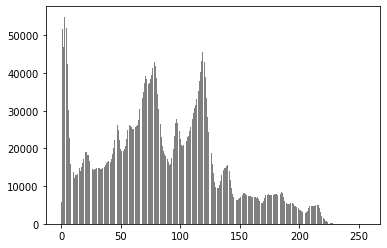

1966
1966


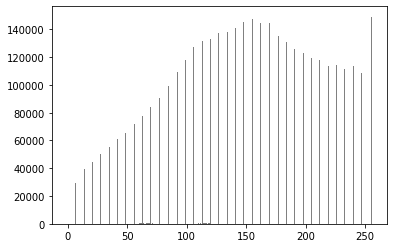

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

original_img=cv2.imread("lena.jpg")

gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

# Display the original histogram
img_size = gray_img.shape
heights = img_size[0]
widths = img_size[1]

store = np.zeros((256,),dtype=np.int32)
saved = np.zeros((256,),dtype=np.int32)
for i in range(heights):
    for j in range(widths):
       k = gray_img[i,j]
       store[k] += 1
x = np.arange(0,256)
plt.bar(x,store,color="gray",align="center")
plt.show()

# Define the size of filter
size = 7

# Add the padding around the image
padding = np.around(size // 2)
gray_img = cv2.copyMakeBorder(gray_img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

# Get the new image size
shape=gray_img.shape
height_new=shape[0]
width_new=shape[1]

print(height_new)
print(width_new)

# Define the matrix for store and saved the cumulative distribution function
store = np.zeros((256,),dtype=np.int32)
saved = np.zeros((256,),dtype=np.int32)

# Copy the original image, used to display the new result
gray_img_copy = gray_img.copy()

# Looping for the entire image
for a in range(3,height_new-2):
    for b in range(3, width_new-2):
        # Looping for the entire window size
        for c in range(a-3, a+3):
            for d in range(b-3, b+3):
                # Get the pixel value in the current pixel position
                k = gray_img[c, d]
                store[k] += 1

        # Perform the cumulative distribution function        
        sum_hist = np.cumsum(store)

        # Get the new pixel value from the cumulative distribution
        for x in range(0, 256):
            saved[x] = sum_hist[x] * 255 / sum_hist[255]

        # Write new pixel value into the copied image  
        k = gray_img[a, b]
        gray_img_copy[a, b] = saved[k]

        # Reset the stored value
        sum_hist = np.zeros((256,),dtype=np.int32)
        saved = np.zeros((256,),dtype=np.int32)
        store = np.zeros((256,),dtype=np.int32)

# Show and save the result
# Display the original histogram
store = np.zeros((256,),dtype=np.int32)
saved = np.zeros((256,),dtype=np.int32)
for i in range(height_new):
    for j in range(width_new):
       k = gray_img_copy[i,j]
       store[k] += 1
x = np.arange(0,256)
plt.bar(x,store,color="gray",align="center")
plt.show()

cv2.imshow('Display the result', gray_img_copy)
cv2.imwrite("result_local.jpg", gray_img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()